In [38]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

Note: you may need to restart the kernel to use updated packages.


In [39]:
class EnedisCSVCollector:
    def __init__(self, csv_path: str):
        self.csv_path = Path(csv_path)
        self.df = None

    def load_csv(self):
        if not self.csv_path.exists():
            raise FileNotFoundError(f"Fichier CSV introuvable : {self.csv_path}")
        self.df = pd.read_csv(self.csv_path, sep=';', quotechar='"', encoding='utf-8')
        logger.info(f"{len(self.df)} lignes chargées depuis {self.csv_path}")

    # def preprocess(self):
    #     # Afficher les colonnes pour aider à adapter le code
    #     print("Colonnes du CSV :", self.df.columns.tolist())
    def preprocess(self):
    # Normalisation des colonnes (minuscules, underscores, pas d'accents)
        self.df.columns = self.df.columns.str.strip().str.lower()\
            .str.replace(" ", "_")\
            .str.normalize('NFKD')\
            .str.encode('ascii', errors='ignore')\
            .str.decode('utf-8')

        print("Colonnes après normalisation :", self.df.columns.tolist())

    def clean_data(self):
    # Nettoyer les noms de colonnes
        self.df.columns = (
            self.df.columns
            .str.lower()
            .str.strip()
            .str.replace(' ', '_')
            .str.replace('(', '', regex=False)
            .str.replace(')', '', regex=False)
            .str.replace('__', '_')
        )

        # Garder uniquement les colonnes utiles (à adapter selon ton besoin)
        colonnes_utiles = [
            'annee', 'code_departement', 'nom_departement',
            'conso_totale_mwh', 'conso_totale_usages_thermosensibles_mwh',
            'conso_totale_usages_non_thermosensibles_mwh'
        ]
        self.df = self.df[[col for col in colonnes_utiles if col in self.df.columns]]

        # Conversion en types numériques (si nécessaire)
        for col in self.df.columns:
            if 'conso' in col:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Supprimer les lignes avec des valeurs manquantes
        self.df.dropna(inplace=True)

        # Supprimer les doublons
        self.df.drop_duplicates(inplace=True)

        logger.info(f"Données nettoyées : {self.df.shape[0]} lignes, {self.df.shape[1]} colonnes")


        # Exemple de renommage (à adapter après affichage des colonnes)
        self.df.rename(columns={
            "Code département": "code_departement",
            "Année": "annee",
            "Consommation (MWh)": "consommation"
        }, inplace=True)

    def filter_by_department_and_year(self, department_code: str, year: int):
        return self.df[
            (self.df["code_departement"] == department_code) &
            (self.df["annee"] == year)
        ]

    def plot_consumption(self, df_filtered: pd.DataFrame, department_code: str, year: int):
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_filtered, x="code_grand_secteur", y="conso_totale_(mwh)")
        plt.title(f"Consommation par secteur dans le {department_code} en {year}")
        plt.xlabel("Secteur")
        plt.ylabel("Consommation (MWh)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


/tmp/ipykernel_43704/1419748893.py:9: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(self.csv_path, sep=';', quotechar='"', encoding='utf-8')
INFO:__main__:56103 lignes chargées depuis enedis_data.csv


Colonnes après normalisation : ['annee', 'code_departement', 'nom_departement', 'code_region', 'nom_region', 'code_categorie_consommation', 'code_grand_secteur', 'code_secteur_naf2', 'nb_sites', 'conso_totale_(mwh)', 'conso_moyenne_(mwh)', 'nombre_de_mailles_secretisees', 'part_thermosensible_(%)', 'conso_totale__usages_thermosensibles_(mwh)', 'conso_totale__usages_non_thermosensibles_(mwh)', 'thermosensibilite_totale_(kwh/dju)', "conso_totale_corrigee_de_l'alea_climatique__usages_thermosensibles_(mwh)", 'conso_moyenne_usages_thermosensibles_(mwh)', 'conso_moyenne__usages_non_thermosensibles_(mwh)', 'thermosensibilite_moyenne_(kwh/dju)', "conso_moyenne_corrigee_de_l'alea_climatique__usages_thermosensibles_(mwh)", 'dju_a_tr', 'dju_a_tn', "nombre_d'habitants", 'taux_de_logements_collectifs', 'taux_de_residences_principales', 'superficie_des_logements_<_30_m2', 'superficie_des_logements_30_a_40_m2', 'superficie_des_logements_40_a_60_m2', 'superficie_des_logements_60_a_80_m2', 'superficie_

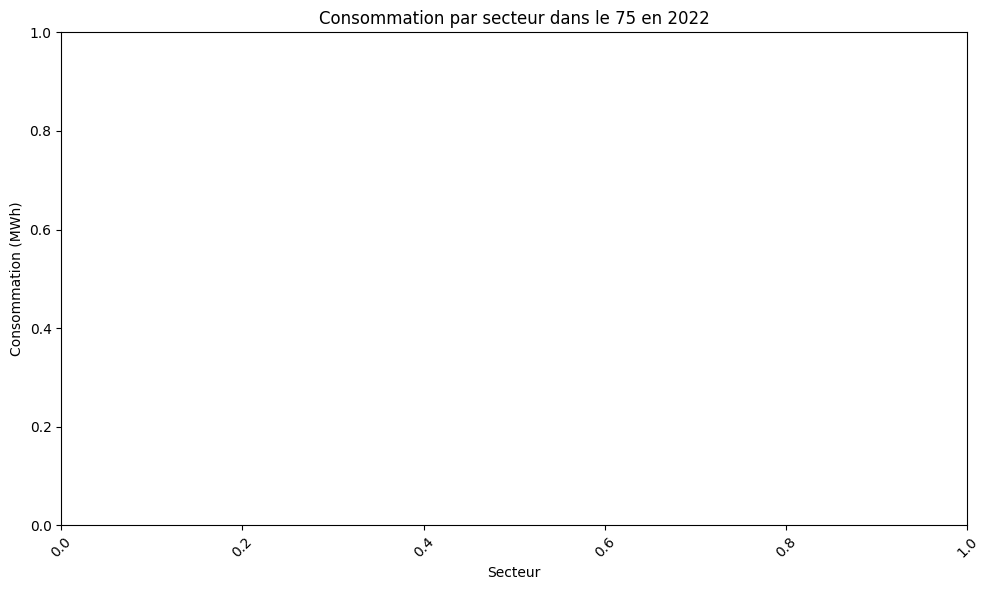

,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,nb_sites,conso_totale_(mwh),...,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique,geom,centroid


In [40]:

collector = EnedisCSVCollector(csv_path="enedis_data.csv")

# Charger et préparer les données
collector.load_csv()
collector.preprocess()

# Filtrer les données pour un département et une année donnés
df_filtered = collector.filter_by_department_and_year(department_code="75", year=2022)

# Sauvegarder les données filtrées
collector.plot_consumption(df_filtered, department_code="75", year=2022)

# Afficher un aperçu
df_filtered.head()


In [41]:
collector.df.head() 

,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,nb_sites,conso_totale_(mwh),...,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique,geom,centroid
0,2024,77,Seine-et-Marne,11,Île-de-France,PRO,INDUSTRIE,NaN,5314,46585.495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48.627498813, 2.934085631"
1,2024,76,Seine-Maritime,28,Normandie,ENT,TERTIAIRE,36.0,287,71664.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"49.654833805, 1.028149227"
2,2024,76,Seine-Maritime,28,Normandie,ENT,TERTIAIRE,51.0,2,351.609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"49.654833805, 1.028149227"
3,2024,76,Seine-Maritime,28,Normandie,ENT,TERTIAIRE,52.0,348,169173.910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"49.654833805, 1.028149227"
4,2024,76,Seine-Maritime,28,Normandie,ENT,TERTIAIRE,63.0,4,679.559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"49.654833805, 1.028149227"


In [42]:
collector.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56103 entries, 0 to 56102
Data columns (total 42 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   annee                                                                      56103 non-null  int64  
 1   code_departement                                                           56103 non-null  int64  
 2   nom_departement                                                            56103 non-null  object 
 3   code_region                                                                56103 non-null  int64  
 4   nom_region                                                                 56103 non-null  object 
 5   code_categorie_consommation                                                56103 non-null  object 
 6   code_grand_secteur                                    

In [43]:
n_lignes = collector.df.shape[0]   # Nombre de lignes
n_colonnes = collector.df.shape[1]  # Nombre de colonnes

print(f"Nombre de lignes : {n_lignes}")
print(f"Nombre de colonnes : {n_colonnes}")

Nombre de lignes : 56103
Nombre de colonnes : 42


In [44]:
collector.df.isnull().sum().sort_values(ascending=False)


residences_principales_avant_1919                                            56009
residences_principales_de_1919_a_1945                                        56009
residences_principales_de_1946_a_1970                                        56009
residences_principales_de_1971_a_1990                                        56009
residences_principales_de_1991_a_2005                                        56009
residences_principales_de_2006_a_2015                                        56009
residences_principales_apres_2016                                            56009
taux_de_logements_collectifs                                                 56009
nombre_d'habitants                                                           56009
taux_de_residences_principales                                               56009
geom                                                                         56009
taux_de_chauffage_electrique                                                 56009
supe

In [45]:
collector = EnedisCSVCollector(csv_path="enedis_data.csv")
collector.load_csv()
collector.preprocess()
collector.clean_data()
collector.df.head()

/tmp/ipykernel_43704/1419748893.py:9: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(self.csv_path, sep=';', quotechar='"', encoding='utf-8')
INFO:__main__:56103 lignes chargées depuis enedis_data.csv
INFO:__main__:Données nettoyées : 752 lignes, 6 colonnes


Colonnes après normalisation : ['annee', 'code_departement', 'nom_departement', 'code_region', 'nom_region', 'code_categorie_consommation', 'code_grand_secteur', 'code_secteur_naf2', 'nb_sites', 'conso_totale_(mwh)', 'conso_moyenne_(mwh)', 'nombre_de_mailles_secretisees', 'part_thermosensible_(%)', 'conso_totale__usages_thermosensibles_(mwh)', 'conso_totale__usages_non_thermosensibles_(mwh)', 'thermosensibilite_totale_(kwh/dju)', "conso_totale_corrigee_de_l'alea_climatique__usages_thermosensibles_(mwh)", 'conso_moyenne_usages_thermosensibles_(mwh)', 'conso_moyenne__usages_non_thermosensibles_(mwh)', 'thermosensibilite_moyenne_(kwh/dju)', "conso_moyenne_corrigee_de_l'alea_climatique__usages_thermosensibles_(mwh)", 'dju_a_tr', 'dju_a_tn', "nombre_d'habitants", 'taux_de_logements_collectifs', 'taux_de_residences_principales', 'superficie_des_logements_<_30_m2', 'superficie_des_logements_30_a_40_m2', 'superficie_des_logements_40_a_60_m2', 'superficie_des_logements_60_a_80_m2', 'superficie_

,annee,code_departement,nom_departement,conso_totale_mwh,conso_totale_usages_thermosensibles_mwh,conso_totale_usages_non_thermosensibles_mwh
31,2024,74,Haute-Savoie,1984587.487,494466.552,1490120.935
69,2024,71,Saône-et-Loire,1319603.575,262442.997,1057160.578
128,2024,64,Pyrénées-Atlantiques,1575968.844,283402.697,1292566.147
201,2024,57,Moselle,1479109.092,312108.655,1167000.437
316,2024,46,Lot,521784.582,111663.444,410121.138


In [47]:
departements = collector.df['code_departement'].unique()
print(f"Départements présents : {sorted(departements)}")

Départements présents : [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.i

In [48]:
nombre_departements = collector.df['code_departement'].nunique()
print(f"Nombre de départements : {nombre_departements}")

Nombre de départements : 94


In [49]:
df_par_departement = collector.df.groupby('code_departement', as_index=False)['conso_totale_mwh'].sum()
df_par_departement.head()

,code_departement,conso_totale_mwh
0,1,1.356892e+07
1,2,9.245363e+06
2,3,7.012294e+06
3,4,4.450037e+06
4,5,3.533242e+06


In [51]:
%pip install geopandas

import geopandas as gpd

# Charger le fichier GeoJSON des départements
geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
gdf_depts = gpd.read_file(geojson_url)


  Using cached pyproj-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 141.5 MB/s eta 0:00:00
Using cached pyproj-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]/4 [geopandas]
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Le champ 'code' dans le GeoJSON correspond au code département
gdf_depts['code'] = gdf_depts['code'].astype(str).str.zfill(2)
df_par_departement['code_departement'] = df_par_departement['code_departement'].astype(str).str.zfill(2)

# Fusion
gdf_merged = gdf_depts.merge(df_par_departement, left_on='code', right_on='code_departement')


<Figure size 1200x1000 with 0 Axes>

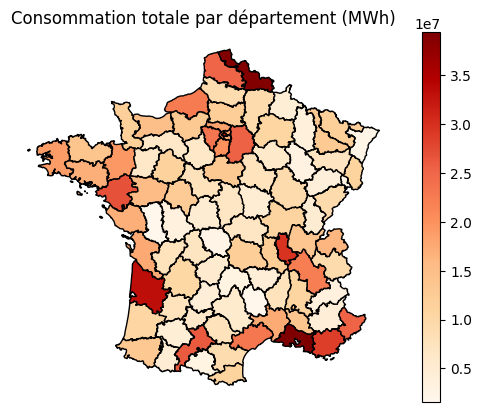

In [53]:
plt.figure(figsize=(12, 10))
gdf_merged.plot(column='conso_totale_mwh', cmap='OrRd', legend=True, edgecolor='black')
plt.title("Consommation totale par département (MWh)")
plt.axis('off')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_43704/1744916564.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_par_departement, x='code_departement', y='conso_totale_mwh', palette='viridis')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


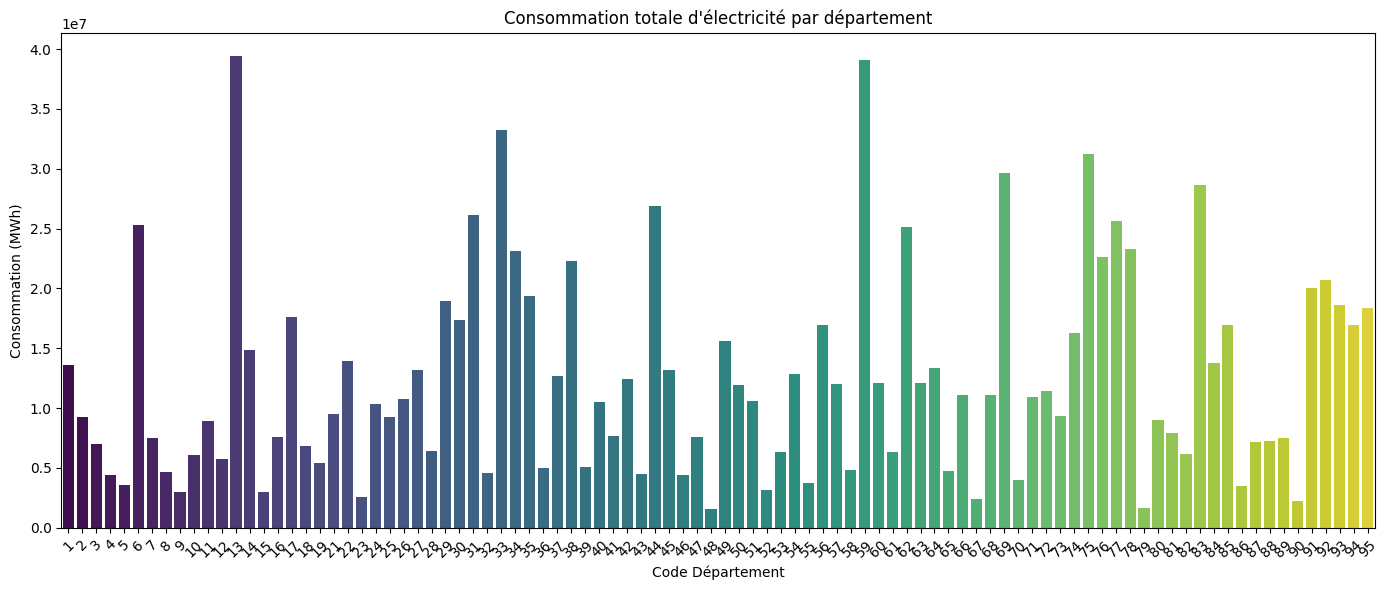

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agréger la consommation par département
df_par_departement = collector.df.groupby('code_departement', as_index=False)['conso_totale_mwh'].sum()

# Trier les départements du plus consommateur au moins
df_par_departement = df_par_departement.sort_values(by='conso_totale_mwh', ascending=False)

# Créer un graphique
plt.figure(figsize=(14, 6))
sns.barplot(data=df_par_departement, x='code_departement', y='conso_totale_mwh', palette='viridis')

plt.title("Consommation totale d'électricité par département")
plt.xlabel("Code Département")
plt.ylabel("Consommation (MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
#!/usr/bin/env python3
"""
Script de collecte de données météo par commune ou département.
"""

import asyncio
import argparse
import sys
from pathlib import Path
from loguru import logger

# ───────────── CONFIGURATION DU PYTHONPATH ─────────────
project_root = Path(__file__).resolve().parent.parent
src_path = project_root / "src"
if src_path.exists():
    sys.path.insert(0, str(src_path))

# ───────────── IMPORTS APRES AJOUT PYTHONPATH ─────────────
from data.collectors.meteo_france import MeteoFranceCollector, collect_meteo_data_for_communes
from config import settings

# ───────────── FONCTIONS DE COLLECTE ─────────────

async def collect_by_department(department_code: str, start_year: int, end_year: int):
    """Collecte les données météo pour un département."""
    logger.info(f"🌤️ Collecte département {department_code} ({start_year}-{end_year})")

    async with MeteoFranceCollector() as collector:
        data = await collector.collect_department_data(department_code, start_year, end_year)

        if not data.empty:
            output_path = settings.RAW_DATA_PATH / "meteo" / "by_department"
            output_path.mkdir(parents=True, exist_ok=True)

            filename = f"meteo_{department_code}_{start_year}_{end_year}.parquet"
            data.to_parquet(output_path / filename)

            logger.info(f"✅ Sauvegardé {len(data)} enregistrements dans {filename}")
            print(f"\n📊 {department_code} : {len(data)} lignes - {data['commune_code'].nunique()} communes")
            return data
        else:
            logger.warning(f"❌ Aucune donnée collectée pour {department_code}")
            return None


async def collect_by_communes(commune_codes: list, start_year: int, end_year: int):
    """Collecte les données météo pour une liste de communes."""
    logger.info(f"🌤️ Collecte {len(commune_codes)} communes ({start_year}-{end_year})")

    data = await collect_meteo_data_for_communes(commune_codes, start_year, end_year)

    if not data.empty:
        output_path = settings.RAW_DATA_PATH / "meteo" / "by_commune"
        output_path.mkdir(parents=True, exist_ok=True)

        filename = f"meteo_communes_{start_year}_{end_year}.parquet"
        data.to_parquet(output_path / filename)

        logger.info(f"✅ Sauvegardé {len(data)} enregistrements dans {filename}")
        print(f"\n📊 Communes : {len(commune_codes)} - {len(data)} lignes - {data['station_id'].nunique()} stations")
        return data
    else:
        logger.warning(f"❌ Aucune donnée collectée")
        return None

# ───────────── FONCTION PRINCIPALE ─────────────

def main():
    parser = argparse.ArgumentParser(description="Collecte de données météo par commune ou département")

    parser.add_argument("--mode", choices=["department", "communes"], required=True)
    parser.add_argument("--department", type=str, help="Code département (ex: 75)")
    parser.add_argument("--communes", type=str, nargs="+", help="Liste de codes communes (ex: 75001 75002)")
    parser.add_argument("--start-year", type=int, default=2020)
    parser.add_argument("--end-year", type=int, default=2023)
    parser.add_argument("--api-key", type=str, help="Clé API à surcharger")

    args = parser.parse_args()

    # Surcharge API key si fournie
    if args.api_key:
        settings.METEO_FRANCE_API_KEY = args.api_key

    logger.remove()
    logger.add(sys.stdout, format="<green>{time:HH:mm:ss}</green> | <level>{level}</level> | {message}", level="INFO")

    try:
        if args.mode == "department":
            if not args.department:
                parser.error("--department est requis en mode department")
            result = asyncio.run(collect_by_department(args.department, args.start_year, args.end_year))
        else:
            if not args.communes:
                parser.error("--communes est requis en mode communes")
            result = asyncio.run(collect_by_communes(args.communes, args.start_year, args.end_year))

        if result is not None:
            print("🎉 Collecte terminée avec succès !")
        else:
            sys.exit(1)

    except KeyboardInterrupt:
        print("⏹️ Collecte interrompue")
        sys.exit(1)
    except Exception as e:
        logger.error(f"Erreur inattendue : {e}")
        sys.exit(1)

if __name__ == "__main__":
    main()


NameError: name '__file__' is not defined